In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_ds_salaries = pd.read_csv("data_science_salaries.csv")

In [4]:
df_ds_salaries["job_title"].value_counts().head(15)

job_title
Data Engineer                     1307
Data Scientist                    1243
Data Analyst                       910
Machine Learning Engineer          629
Analytics Engineer                 246
Research Scientist                 206
Data Architect                     176
Research Engineer                  136
ML Engineer                        113
Applied Scientist                   97
Data Science Manager                86
Business Intelligence Analyst       82
Machine Learning Scientist          73
Business Intelligence Engineer      69
Data Manager                        63
Name: count, dtype: int64

In [5]:
df_ds_salaries["experience_level"].unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

In [6]:
df_ds_salaries["experience_level"].value_counts()

experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64

In [7]:
df_ds_salaries["work_models"].value_counts()


work_models
On-site    3813
Remote     2561
Hybrid      225
Name: count, dtype: int64

In [8]:
df_ds_salaries["company_location"].unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Ukraine', 'Turkey', 'Thailand',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Russia', 'Qatar', 'Poland', 'Philippines', 'New Zealand',
       'Norway', 'Netherlands', 'Nigeria', 'Mexico', 'Latvia',
       'Luxembourg', 'Lithuania', 'South Korea', 'Kenya', 'Japan',
       'Italy', 'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece',
       'Gibraltar', 'Ghana', 'France', 'Finland', 'Estonia', 'Ecuador',
       'Denmark', 'Czech Republic', 'Colombia', 'Switzerland',
       'Central African Republic', 'Brazil', 'Bosnia and Herzegovina',
       'Armenia', 'Argentina', 'Andorra', 'United Arab Emirates',
       'Puerto Rico', 'Pakistan', 'Malaysia', 'Iran', 'Indonesia',
       'Algeria', 'Belgium', 'Austria', 'Malta', 'Moldova', 'Iraq',
       'China', 'Chile', 'Bahamas', 'Mauritius

In [9]:
df_ds_salaries["company_location"].value_counts().head(15)

company_location
United States     5354
United Kingdom     408
Canada             243
Germany             78
Spain               63
India               58
France              49
Australia           32
Portugal            26
Netherlands         21
Brazil              17
Colombia            14
Italy               13
Greece              11
Mexico              11
Name: count, dtype: int64

In [10]:
df_ds_salaries = df_ds_salaries.rename(
    columns={
        'job_title': 'Job Title',
        'experience_level': 'Experience Level',
        'employment_type': 'Employment Type',
        'work_models': 'Work Models',
        'work_year': 'Work Year',
        'employee_residence': 'Employee Residence',
        'salary': 'Salary',
        'salary_currency': 'Salary Currency',
        'salary_in_usd': 'Salary in USD',
        'company_location': 'Company Location',
        'company_size': 'Company Size'
    }
)
df_ds_salaries

,Job Title,Experience Level,Employment Type,Work Models,Work Year,Employee Residence,Salary,Salary Currency,Salary in USD,Company Location,Company Size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [11]:
employees_by_company_location = df_ds_salaries.groupby('Company Location').size().reset_index(name='num_employees')
employees_by_company_location = employees_by_company_location.sort_values(by='num_employees', ascending=False)

top_10_employees_by_location = employees_by_company_location.head(10)
print(top_10_employees_by_location)

   Company Location  num_employees
73    United States           5354
72   United Kingdom            408
10           Canada            243
23          Germany             78
65            Spain             63
30            India             58
22           France             49
4         Australia             32
55         Portugal             26
48      Netherlands             21


In [12]:
employees_by_employee_residence = df_ds_salaries.groupby('Employee Residence').size().reset_index(name='num_employees')
employees_by_employee_residence = employees_by_employee_residence.sort_values(by='num_employees', ascending=False)

top_10_employees_by_residence = employees_by_employee_residence.head(10)
print(top_10_employees_by_residence)

   Employee Residence  num_employees
84      United States           5305
83     United Kingdom            401
12             Canada            241
29            Germany             71
35              India             70
74              Spain             67
27             France             53
5           Australia             29
63           Portugal             28
55        Netherlands             21


In [13]:

residence_salary = df_ds_salaries.groupby('Employee Residence')['Salary in USD'].mean().reset_index()
residence_salary = residence_salary.sort_values(by='Salary in USD', ascending=False)

location_salary = df_ds_salaries.groupby('Company Location')['Salary in USD'].mean().reset_index()
location_salary = location_salary.sort_values(by='Salary in USD', ascending=False)

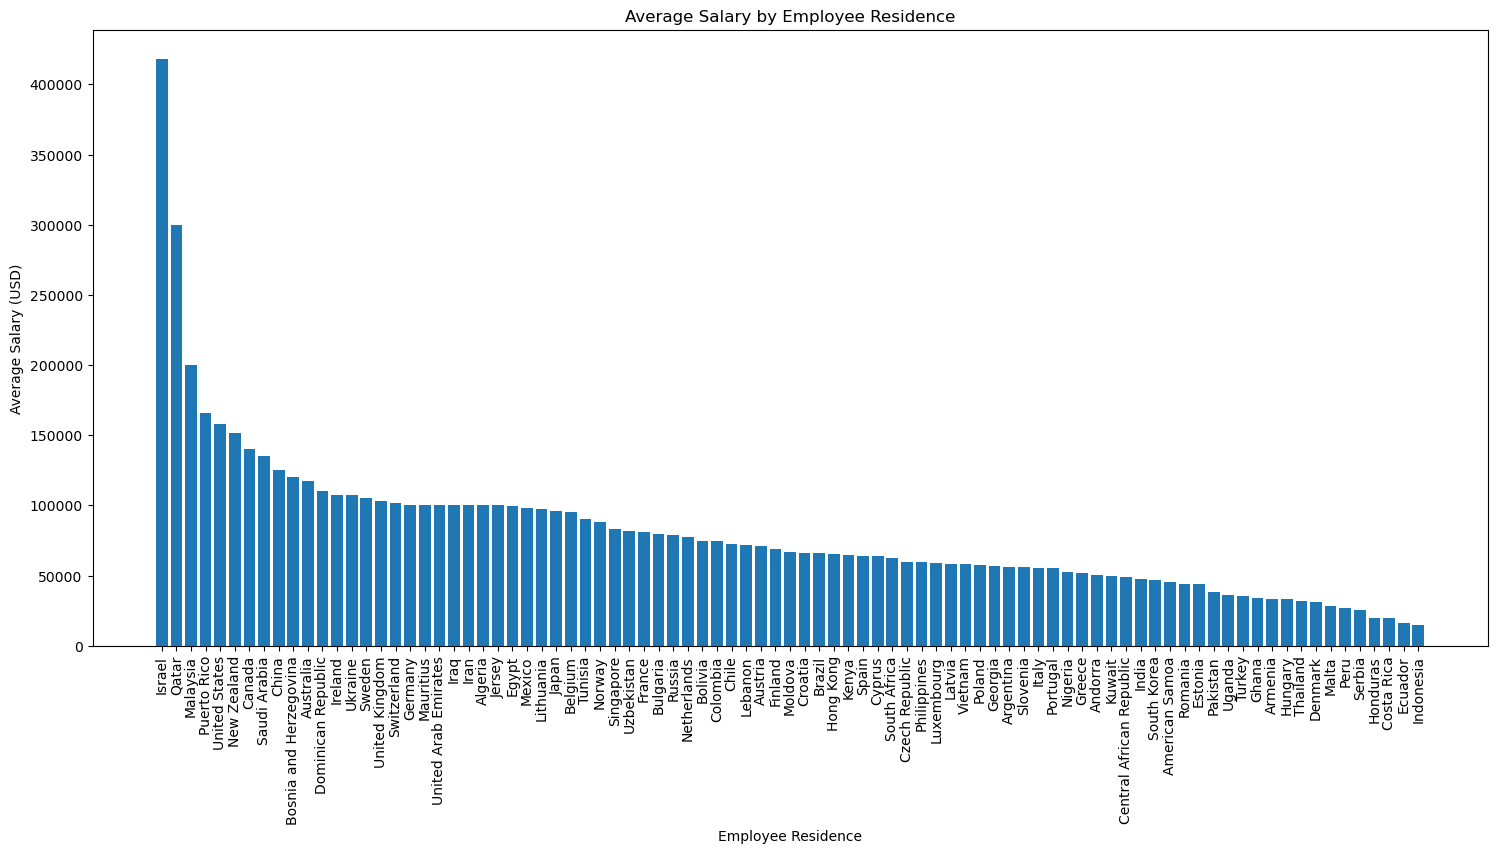

In [14]:
plt.figure(figsize=(18, 8))
plt.bar(residence_salary['Employee Residence'], residence_salary['Salary in USD'])
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Employee Residence')
plt.xticks(rotation=90)
plt.show()

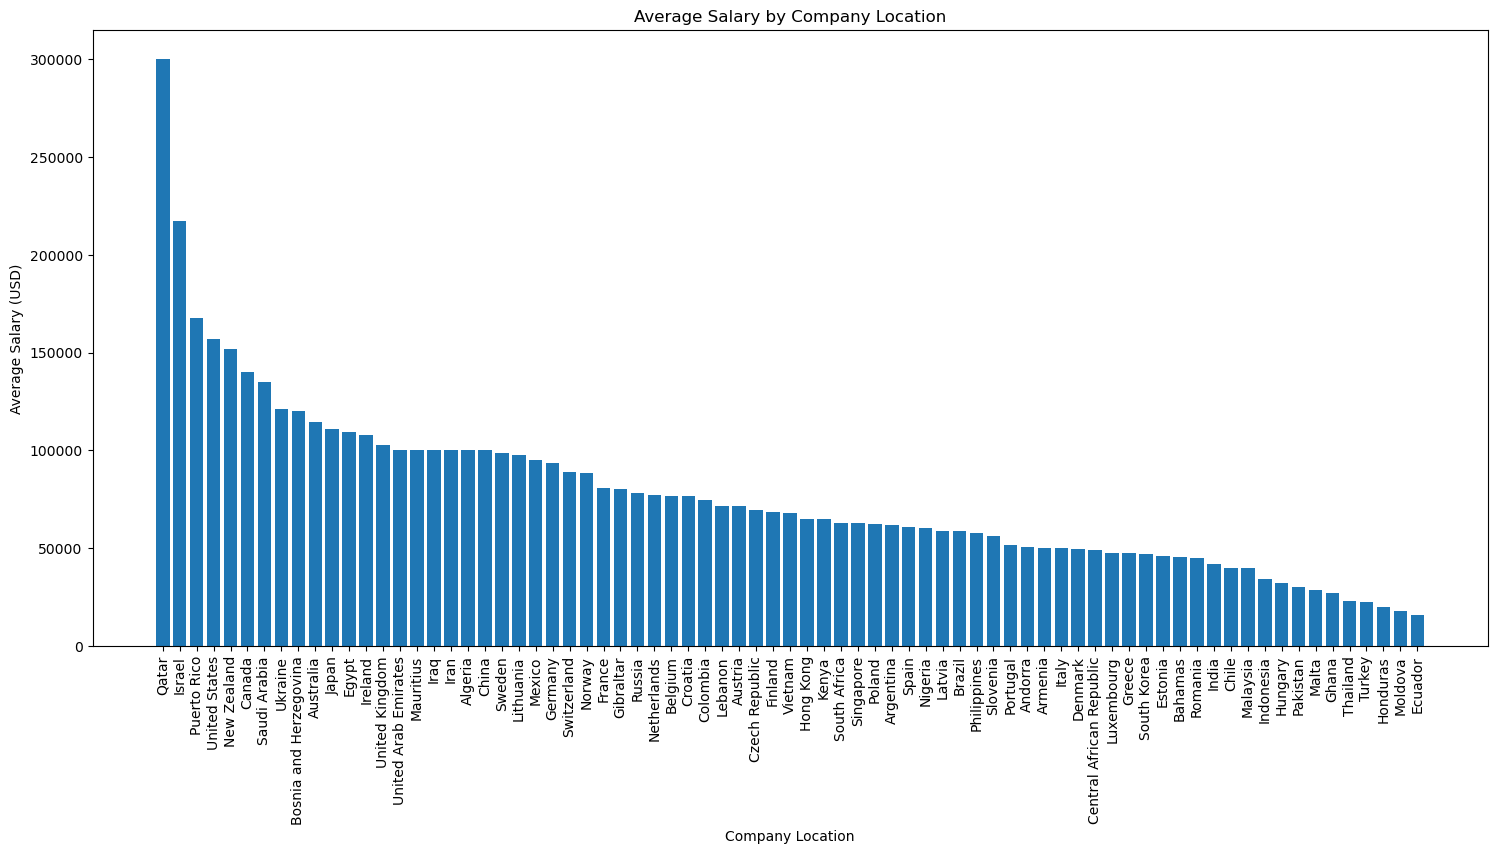

In [15]:
plt.figure(figsize=(18, 8))
plt.bar(location_salary['Company Location'], location_salary['Salary in USD'])
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Location')
plt.xticks(rotation=90)
plt.show()

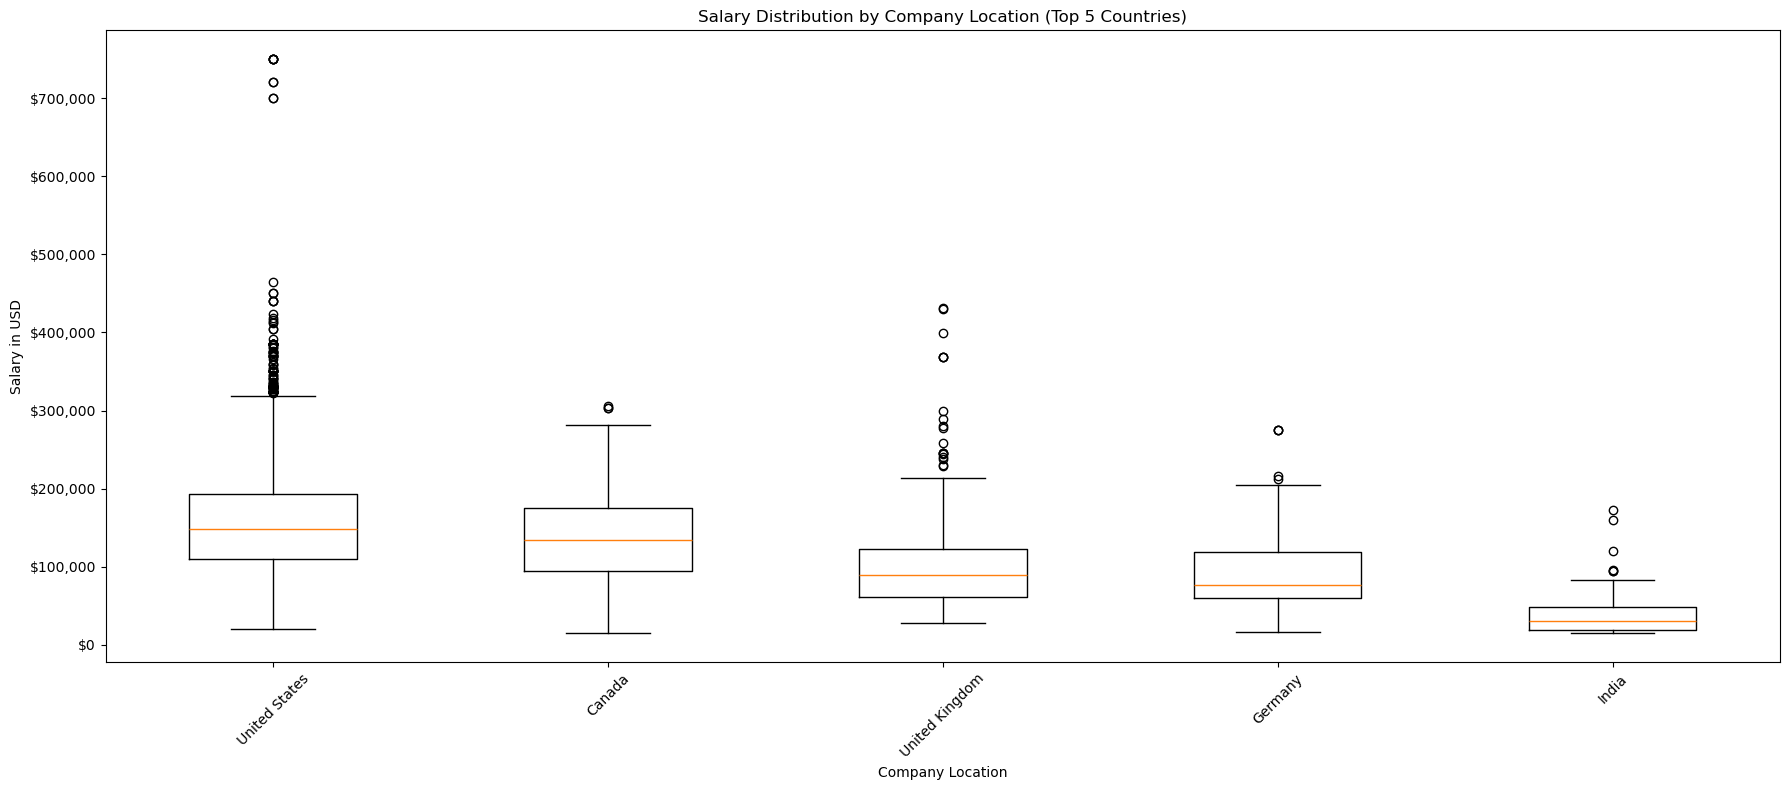

In [24]:
from matplotlib.ticker import FuncFormatter

# List of specified countries
countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'India']

# Filter the DataFrame to include only the specified countries
filtered_data = df_ds_salaries[df_ds_salaries['Company Location'].isin(countries)]

# Calculate the average salary by company location for the specified countries
average_salaries = filtered_data.groupby('Company Location')['Salary in USD'].mean().reset_index()

# Sort values by salary in descending order and get the top N
top_n = 10
high_value_countries = average_salaries.sort_values(by='Salary in USD', ascending=False).head(top_n)['Company Location']

# Filter the data for high-value countries
high_value_data = filtered_data[filtered_data['Company Location'].isin(high_value_countries)]

# Prepare data for box plot
salaries_by_location = [high_value_data[high_value_data['Company Location'] == location]['Salary in USD'] for location in high_value_countries]

# Function to format the Y-axis labels with commas and dollar sign
def y_format(x, pos):
    return '${:,.0f}'.format(x)

# Create the plot
plt.figure(figsize=(18, 8))
plt.boxplot(salaries_by_location, labels=high_value_countries)
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Company Location (Top 5 Countries)')
plt.xticks(rotation=45)

# Apply the formatter to the Y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_format))

plt.tight_layout()
plt.show()

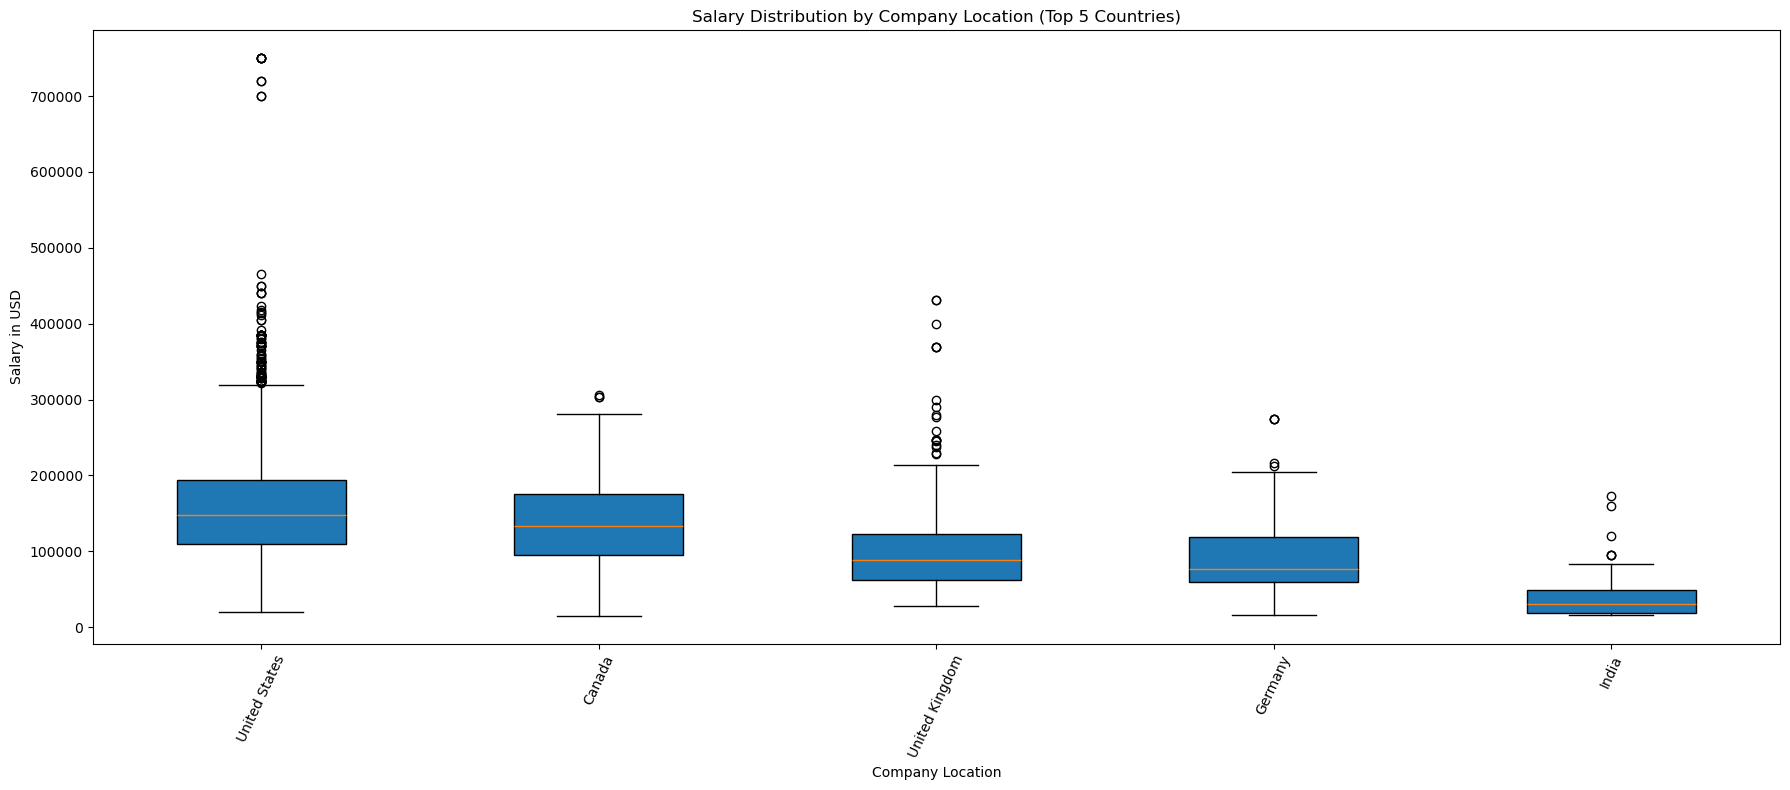

In [16]:
countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'India']

filtered_data = df_ds_salaries[df_ds_salaries['Company Location'].isin(countries)]

average_salaries = filtered_data.groupby('Company Location')['Salary in USD'].mean().reset_index()

top_n = 10
high_value_countries = average_salaries.sort_values(by='Salary in USD', ascending=False).head(top_n)['Company Location']

high_value_data = filtered_data[filtered_data['Company Location'].isin(high_value_countries)]

salaries_by_location = [high_value_data[high_value_data['Company Location'] == location]['Salary in USD'] for location in high_value_countries]

plt.figure(figsize=(18, 8))
plt.boxplot(salaries_by_location, labels=high_value_countries, patch_artist=True)
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Company Location (Top 5 Countries)')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()


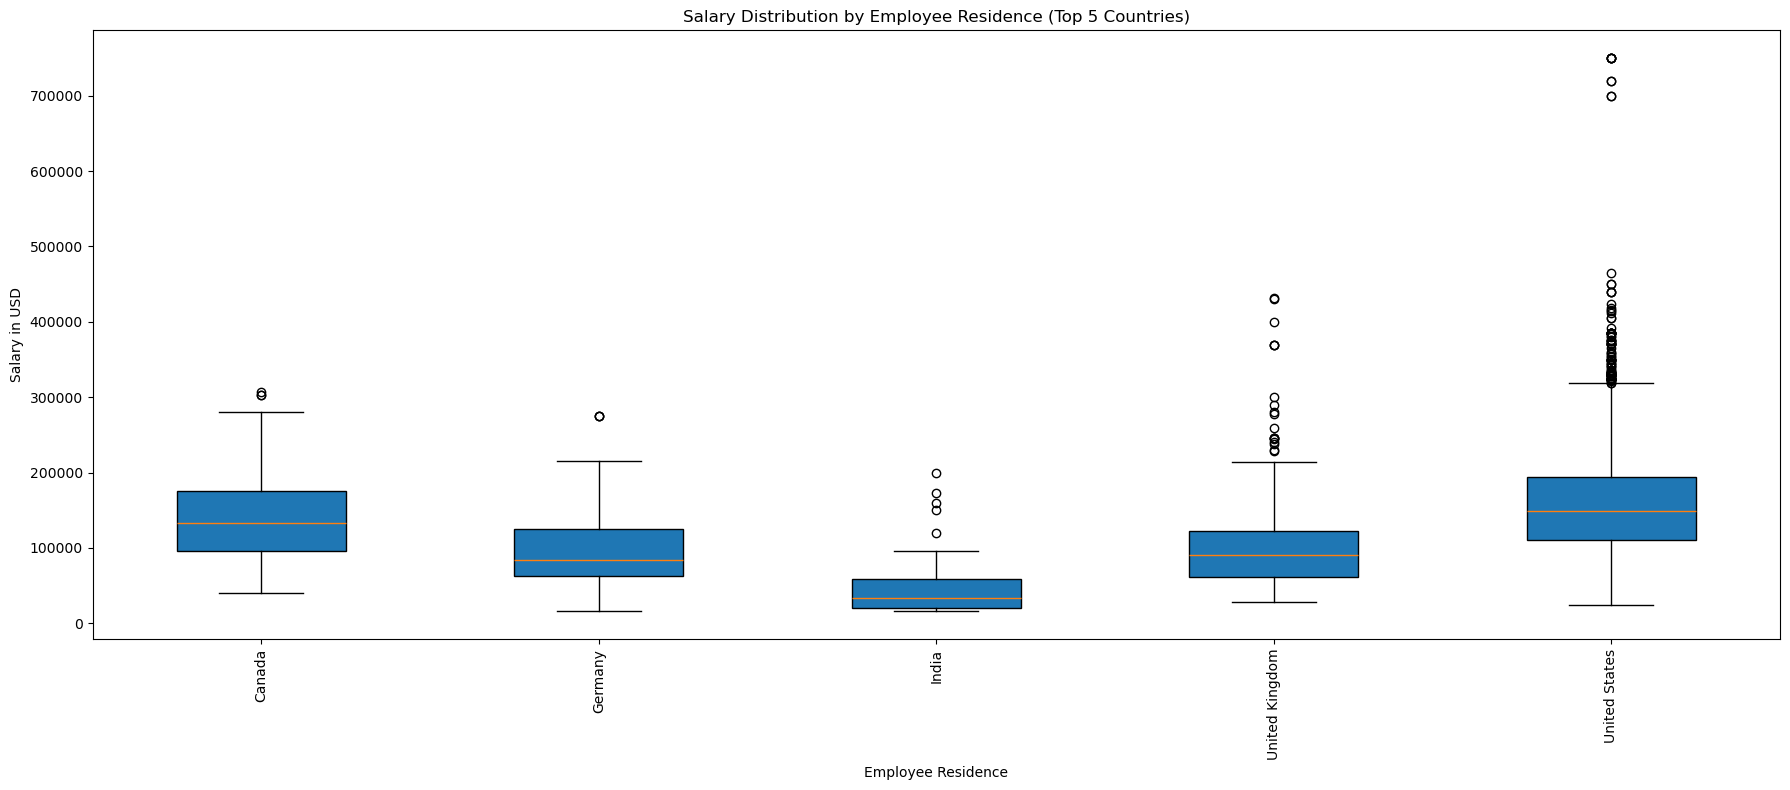

In [52]:
countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'India']

residence_salary = df_ds_salaries[df_ds_salaries['Employee Residence'].isin(countries)][['Employee Residence', 'Salary in USD']]

residence_salary = residence_salary.sort_values(by='Employee Residence')

salaries_by_residence = [residence_salary[residence_salary['Employee Residence'] == residence]['Salary in USD'] for residence in residence_salary['Employee Residence'].unique()]

plt.figure(figsize=(18, 8))
plt.boxplot(salaries_by_residence, labels=residence_salary['Employee Residence'].unique(), patch_artist=True)
plt.xlabel('Employee Residence')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Employee Residence (Top 5 Countries)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

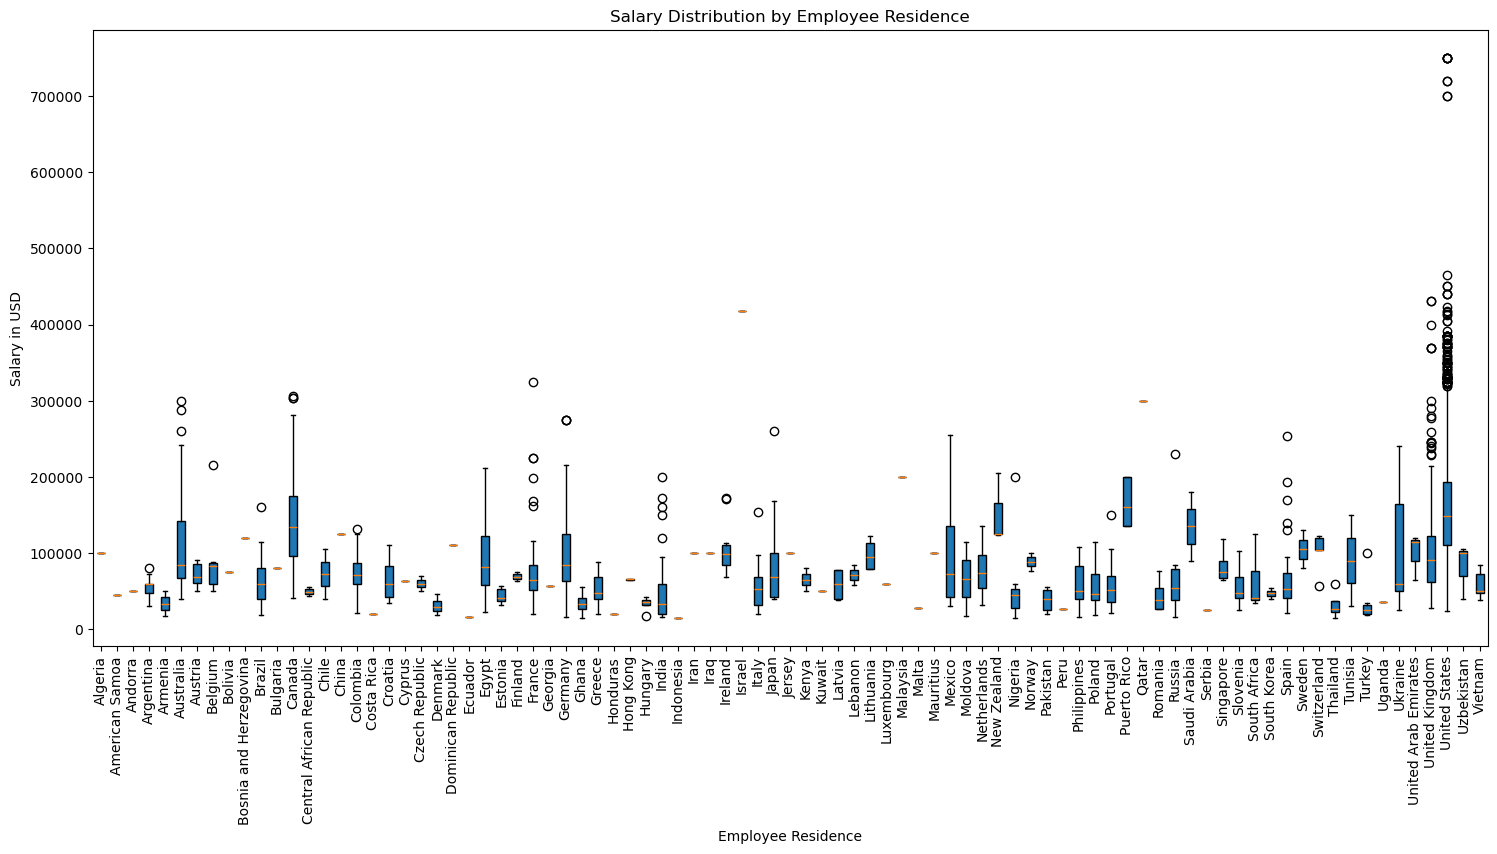

In [19]:
residence_salary = df_ds_salaries[['Employee Residence', 'Salary in USD']]

residence_salary = residence_salary.sort_values(by='Employee Residence')

salaries_by_residence = [residence_salary[residence_salary['Employee Residence'] == residence]['Salary in USD'] for residence in residence_salary['Employee Residence'].unique()]

plt.figure(figsize=(18, 8))
plt.boxplot(salaries_by_residence, labels=residence_salary['Employee Residence'].unique(), patch_artist=True)
plt.xlabel('Employee Residence')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Employee Residence')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# High Salary Residences: The United States shows a high median salary and a broad range of salaries, including several high outliers.
# Variability: Countries like Switzerland, Australia, and Germany have high median salaries and significant variability in salaries.
# Lower Salaries: Countries such as India, Pakistan, and Vietnam show lower median salaries and narrower IQRs, indicating more consistent salary ranges within those countries

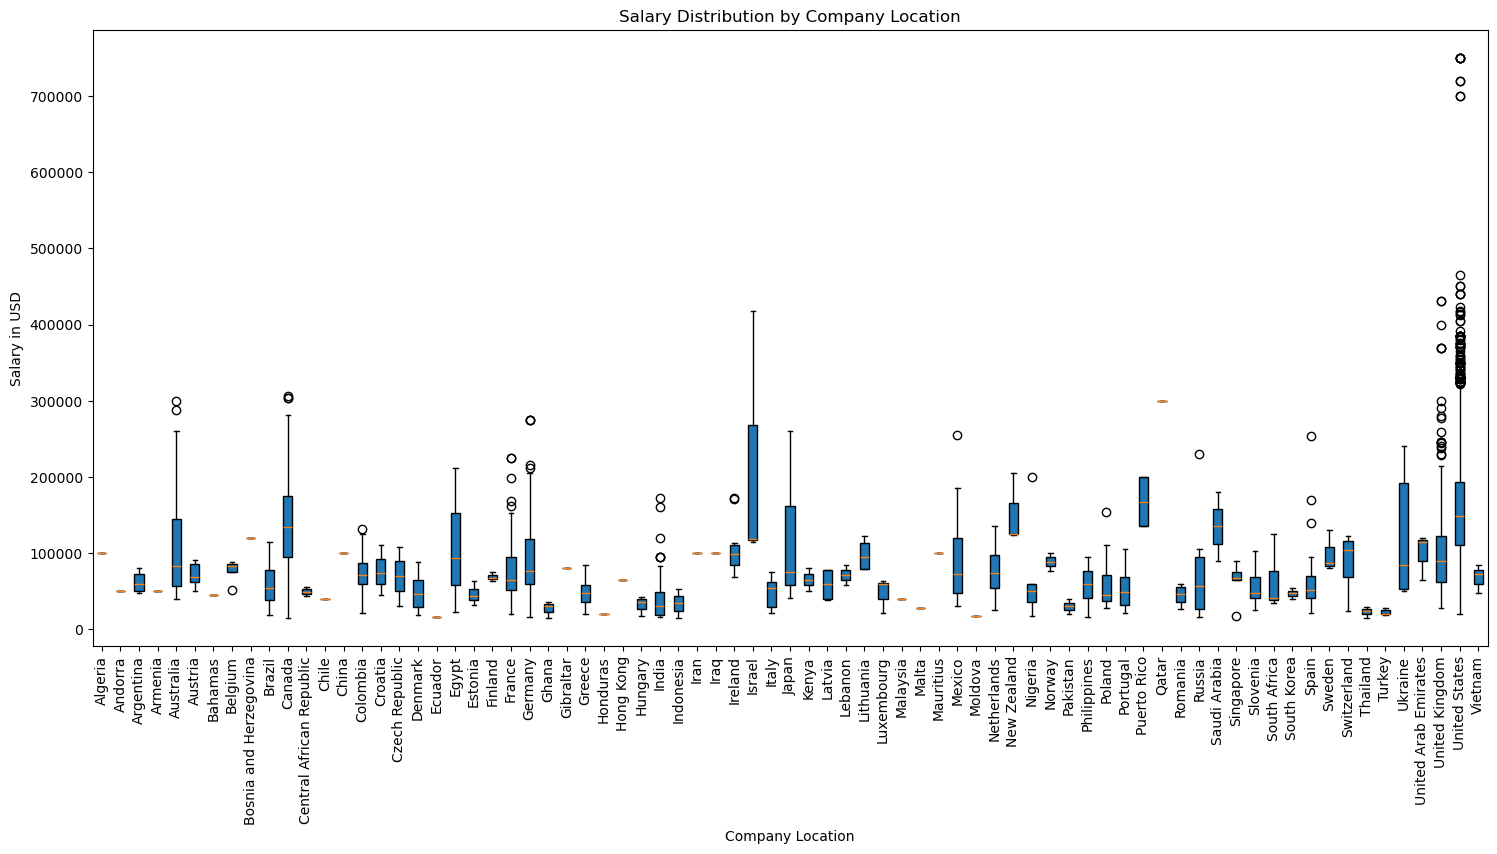

In [21]:
location_salary = df_ds_salaries[['Company Location', 'Salary in USD']]

location_salary = location_salary.sort_values(by='Company Location')

salaries_by_location = [location_salary[location_salary['Company Location'] == location]['Salary in USD'] for location in location_salary['Company Location'].unique()]

plt.figure(figsize=(18, 8))
plt.boxplot(salaries_by_location, labels=location_salary['Company Location'].unique(), patch_artist=True)
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Company Location')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#  High Salary Locations: The United States and Switzerland show high median salaries and a broad range of salaries, including several high outliers.
# Variability: Countries like Israel and Germany have significant variability in salaries, indicated by a wide IQR and many outliers.
# Lower Salaries: Locations such as India, Pakistan, and Vietnam show lower median salaries and narrower IQRs, indicating more consistent salary ranges within those countries.

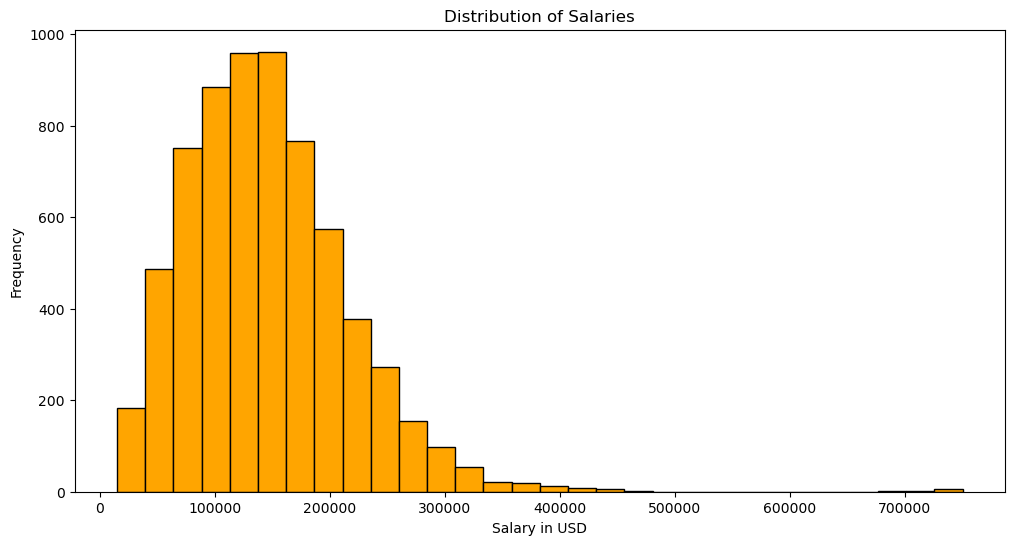

In [24]:
plt.figure(figsize=(12, 6))
plt.hist(df_ds_salaries['Salary in USD'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

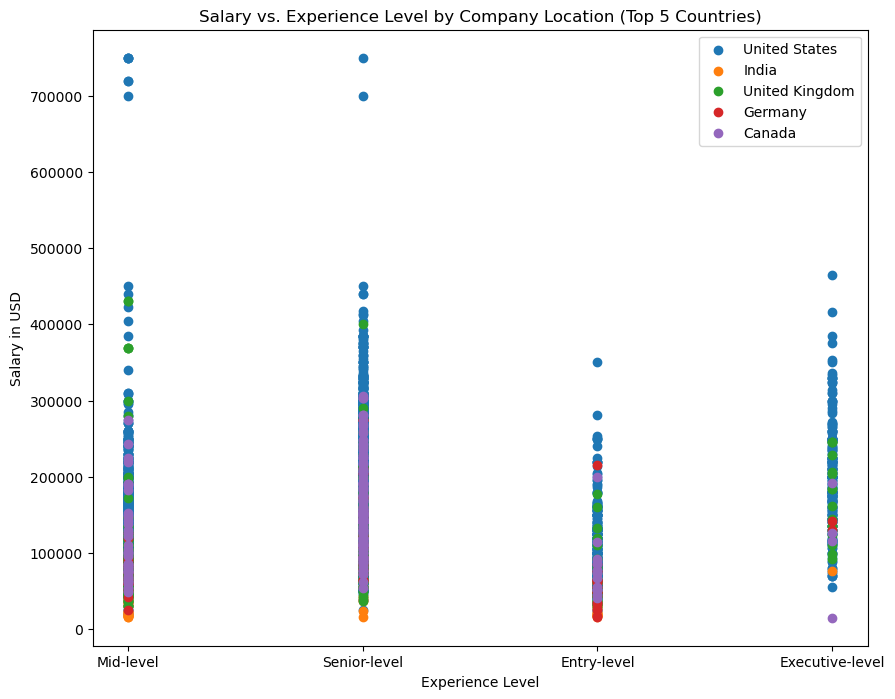

In [55]:
countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'India']
filtered_data = df_ds_salaries[df_ds_salaries['Company Location'].isin(countries)]
location_salary = filtered_data.groupby('Company Location')['Salary in USD'].mean().reset_index()

top_n = 10
high_value_countries = location_salary.sort_values(by='Salary in USD', ascending=False).head(top_n)['Company Location']

high_value_data = filtered_data[filtered_data['Company Location'].isin(high_value_countries)]

plt.figure(figsize=(10, 8))
for location in high_value_data['Company Location'].unique():
    subset = high_value_data[high_value_data['Company Location'] == location]
    plt.scatter(subset['Experience Level'], subset['Salary in USD'], label=location)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary vs. Experience Level by Company Location (Top 5 Countries)')
plt.legend()
plt.show()

In [51]:
countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'India', 'Spain', 'France', 'Australia', 'Portugal', 'Netherlands']

filtered_data = df_ds_salaries[df_ds_salaries['Company Location'].isin(countries)]

summary_stats = filtered_data.groupby('Company Location')['Salary in USD'].describe()
(summary_stats)

,count,mean,std,min,25%,50%,75%,max
Company Location,,,,,,,,
Australia,32.0,114673.406250,74532.633968,40000.0,57067.00,83517.5,144375.00,300000.0
Canada,243.0,139832.753086,58460.591907,15000.0,95000.00,133700.0,175500.00,306400.0
France,49.0,80905.204082,47963.684049,20000.0,51824.00,64781.0,94560.00,225000.0
Germany,78.0,93535.717949,58819.356184,15966.0,59652.00,76240.5,118341.50,275000.0
India,58.0,41699.258621,34127.438216,15809.0,18637.75,30214.0,48444.75,172700.0
Netherlands,21.0,76968.904762,33585.689143,25000.0,54634.00,73546.0,97712.00,134960.0
Portugal,26.0,51512.807692,23221.529087,21013.0,31651.25,49382.5,68674.50,105000.0
Spain,63.0,60887.793651,35326.283282,21593.0,40476.00,51824.0,70500.00,253750.0
United Kingdom,408.0,102897.980392,62455.898596,28299.0,61520.00,89037.5,123040.00,430967.0
